## Building Multi Agent AI Applications with AutoGen 

<a target="_blank" href="https://colab.research.google.com/github/designingwithml/blogposts/blob/main/notebooks/autogen_introduction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Multi-agent AI apps (a setup where multiple agents powered by GenAI models collaborate autonomously) hold promise in addressing complex tasks. In this notebook, the goal is to delve deep into how we might implement such apps using AutoGen. 

In [1]:
## Install AutoGen
# !pip install -qq pyautogen 

In [2]:
from autogen import AssistantAgent, UserProxyAgent
import os

## LLM Configuration Specification 

AutoGen agents take an `llm_config` argument that specifies the LLM configuration for an Agent. 
Importantly, AutoGen standardizes on the openai api format for specifying an LLM. This means the openai and azure openai api are supported out of the box. For Azure Open AI models, the `base_url` and `api_version`  and `api_type` fields are required.

- model: The name of the model 
- api_key: The API key to use.
- base_url: The base URL of the LLM api 
- api_version:  The version of the LLM api (Azure Open AI only)
- api_type: The type of LLM api (Azure Open AI only)


In [3]:
llm_config = {"config_list": [{
        "model": "gpt-4-turbo-preview",
        "api_key": os.environ["OPENAI_API_KEY"],  # Note, add your own API key here
    }],
    "temperature": 0.9,
}

## Stock Price Chart 

The following code demonstrates setting up two agents in AutoGen that collobrate to addres the task: 
"Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png."

In [15]:
assistant = AssistantAgent(
    name= "assistant", llm_config=llm_config)
user_proxy = UserProxyAgent(
    name = "user_proxy", 
    code_execution_config={"work_dir": 
                           "data/scratch", 
                           "use_docker": False},
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
    )  

user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png.") 

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD. Save the result to a file named chart.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of Nvidia (NVDA) and Tesla (TSLA) stock price changes YTD (Year-To-Date), we need to follow these steps:

1. Get the stock price data for NVDA and TSLA for this year.
2. Extract and calculate the price change YTD for both stocks.
3. Plot the data using a Python library such as matplotlib.
4. Save the plot to a file named `chart.png`.

For step 1, we can use the `yfinance` library to fetch the stock data. If you don't have `yfinance` installed, you'll need to install it using pip (`pip install yfinance`). Then, we can proceed with fetching the data, processing it, and plotting it.

I'll provide you with a complete Python code snippet which accomplishes all these steps. Execute the following code:

```python
# filename: plot_stock_chart.py


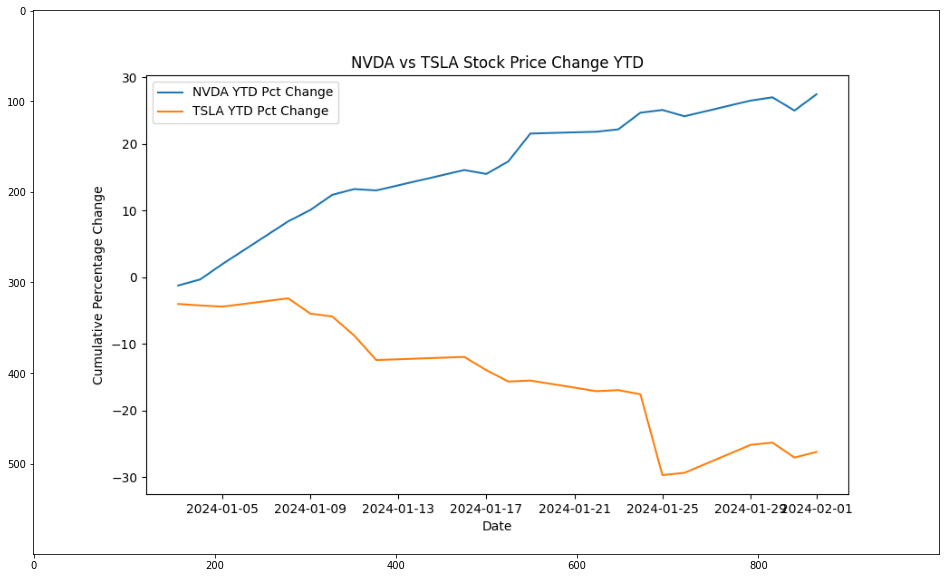

In [17]:
# view the resulting image chart.png
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.imshow(plt.imread("data/scratch/chart.png"));